# Simulate demand, supply, and compute price

Let $A = 1$, and consider 100 periods, so $t \in [0,99]$.
We parametrize the growth rate $\mu$ and $\sigma^2$ below.
Note that these are the expected value and standard deviation of $\log(\epsilon_t)$.
The code below computes and plots demand for paynecoin.

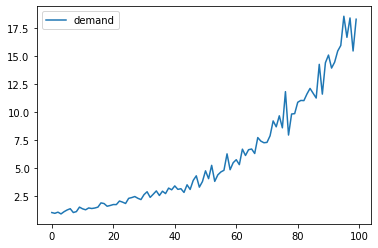

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametrize and compute demand
t = np.arange(100)
A = 1
mu = .03
sigma = .1
epsilon = np.random.lognormal(mean=0, sigma=sigma, size=len(t))
gamma = A * np.exp(mu * t) * np.exp(-0.5*sigma) * epsilon

# Plot demand
plt.plot(gamma, label='demand');plt.legend()

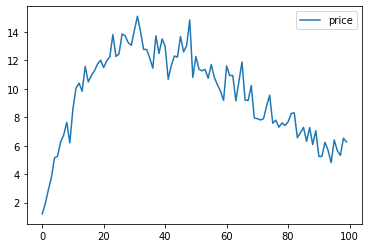

In [109]:
# Supply and equilibrium price
reward = 1
M = np.arange(start = reward, step = reward, stop = reward * (len(t)+1)) 
# plt.plot(M, label='supply')
P = M / gamma
plt.plot(P, label='price');plt.legend()

# Set mining reward such that trends are equal

First note that it is not possible to set a single value for the prize that matches the trend in demand, because the trend grows exponentially. For illustration, the code below plots the supply with a reward of \$0.15 and the current demand.

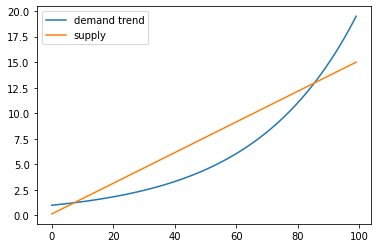

In [95]:
mean_gamma = A * np.exp(mu * t)
# M_trend = np.arange(start = reward_trend, step = reward_trend, stop = reward_trend * (len(t)+1))
M_trend =  0.03 * t
plt.plot(mean_gamma, label='demand trend')
plt.plot(M * 0.15, label='supply')
plt.legend()

However, if we are allowed to set a reward schedule according to our _a priori_ knowledge of the trend in demand, we can stabilize the price in trends. The reward schedule is simply the per-period difference in demand trend.

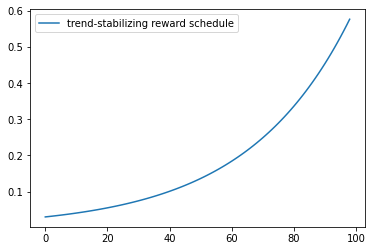

In [106]:
plt.plot(np.diff(mean_gamma), label='trend-stabilizing reward schedule'); plt.legend()

This implies that by construction the money supply is equal to the mean of the demand. The resulting price is stable in trends.

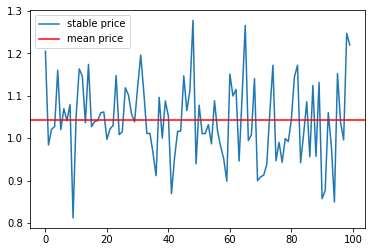

In [120]:
M_trend = A * np.exp(mu * t)
P_trend = M_trend / gamma
plt.plot(P_trend, label='stable price')
plt.axhline(np.mean(P_trend), label='mean price', color='red')
plt.legend()

# Set mining reward such that there is no price volatility

Assuming we know the demand shocks in advance implies we can perfectly forecast demand. Thus, we can use demand to construct a reward schedule that fully stabilizes the price.

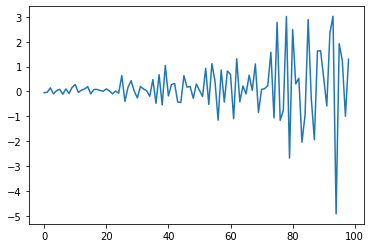

In [107]:
plt.plot(np.diff(gamma), label='anti-volatility reward schedule')

Note that in this case a supply that fully stabilizes the price implies negative rewards in some periods, that is, taking money _out_ of the economy. Programmatically this could be implemented with a mining fee such that the net change in supply is negative. However, unless miners are risk seeking, this would not work in practice because the expected value of mining is negative. Another alternative is to implement a transaction fee. In any case, the net change in supply would have to follow the schedule outlined above.

IRL, so-called "algorithmic" stablecoins have a built in smart contract that automatically retires/buys coins from circulation so that the price rises again to the stipulated peg level.

# To what extent can price be stabilized with a unknown, mean-reverting shock?

This asks us to discuss the result to 3.2: if we know that that $\epsilon_t$ is mean reverting, we can at least hope to stabilize the price around a mean trend. The extent to which overall price can be stabilized depends on how big the shocks are, or in terms of the problem, how we parametrize the demand. We know $\epsilon_t$ follows a log-normal distribution, which in this problem we've parametrized to have mean 0 and standard deviation of 0.1. Larger standard deviations will lead to a more unstable price which would still be centered around the mean, but with large period-to-period deviations. Therefore, the key is to identify the fact that price can only be stabilized to the extent that the variance of the log-normal shocks is relatively small.